In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
data_loc = "data/parkinsons.data"

<IPython.core.display.Javascript object>

In [4]:
df_data = pd.read_csv(data_loc)

<IPython.core.display.Javascript object>

In [5]:
df_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<IPython.core.display.Javascript object>

In [6]:
df_data = df_data.drop(columns="name")

<IPython.core.display.Javascript object>

In [7]:
X = df_data.drop(columns="status")
y = df_data["status"]

<IPython.core.display.Javascript object>

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

<IPython.core.display.Javascript object>

In [40]:
model = LogisticRegression(solver="lbfgs", penalty="none", max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

In [41]:
model.score(X_train, y_train)

0.863013698630137

<IPython.core.display.Javascript object>

In [42]:
model.score(X_test, y_test)

0.8367346938775511

<IPython.core.display.Javascript object>

In [43]:
model = LogisticRegression(solver="lbfgs", max_iter=10000, penalty="l2")
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

In [44]:
model.score(X_train, y_train)

0.8767123287671232

<IPython.core.display.Javascript object>

In [45]:
model.score(X_test, y_test)

0.8571428571428571

<IPython.core.display.Javascript object>

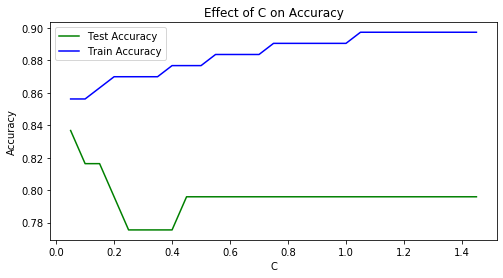

<IPython.core.display.Javascript object>

In [15]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
    lr = LogisticRegression(
        solver="lbfgs", penalty="l2", C=c, max_iter=10000, random_state=2
    )
    lr.fit(X_train, y_train)
    test_accuracy.append(lr.score(X_test, y_test))
    train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, "-g", label="Test Accuracy")
ax1.plot(c_vals, train_accuracy, "-b", label="Train Accuracy")
ax1.set(xlabel="C", ylabel="Accuracy")
ax1.set_title("Effect of C on Accuracy")
ax1.legend()
plt.show()

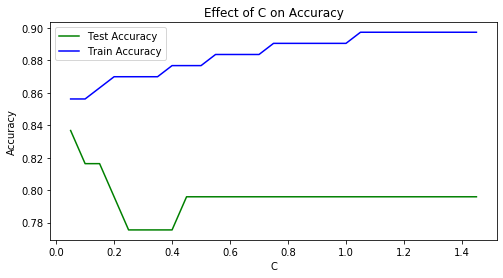

<IPython.core.display.Javascript object>

In [16]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
    lr = LogisticRegression(solver="lbfgs", penalty="l2", C=c, max_iter=10000)
    lr.fit(X_train, y_train)
    test_accuracy.append(lr.score(X_test, y_test))
    train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, "-g", label="Test Accuracy")
ax1.plot(c_vals, train_accuracy, "-b", label="Train Accuracy")
ax1.set(xlabel="C", ylabel="Accuracy")
ax1.set_title("Effect of C on Accuracy")
ax1.legend()
plt.show()

In [17]:
# looks like the best values is around 0.65 or 0.7. I genuinely don't know why

<IPython.core.display.Javascript object>